<h2><center>CS5785 Assignment 2 </center></h2>
      
         
   <center>by Eunsol Choi(ec897), Ling Zhong(lz555)</center>

# Binary Classification on Text Data
## (a)
    (1) How many training and test data points are there? 
        train data: 7613 test data: 3263
    (2) What percentage of the training tweets are of real disasters, and what percentage or not?
        Real disaster:     43.0% (0.42966)
        Not disaster:  57.0% (0.57034)

In [1]:
import pandas as pd
import os.path
import numpy as np

In [2]:
#filedir = os.path.abspath("C:/Users/dd/Documents/CT/2020fall/AML/HW2") 
#filepath = os.join(filedir, filename) 

In [3]:
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
print("train data: ", train.shape)
print("test data: ", test.shape)

train data:  (7613, 5)
test data:  (3263, 4)


In [6]:
train.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
real_disaster_p = print((train['target'] == 1).value_counts()/7613) 

False    0.57034
True     0.42966
Name: target, dtype: float64


## (b) Split the train dataset 
    Randomly choose 70% of the data points in the training data as the train set, and the remaining 30% of the data as the dev set.

In [8]:
y = train.pop('target').values
X = train

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=0.70,test_size=0.30, random_state=3)
print("train data: ",X_train.shape)
print("dev data: ",X_dev.shape)

train data:  (5329, 4)
dev data:  (2284, 4)


In [10]:
X_train.columns

Index(['id', 'keyword', 'location', 'text'], dtype='object')

In [11]:
#Check null values
X_train.isnull().sum()

id             0
keyword       41
location    1792
text           0
dtype: int64

## (c) Preprocess the Data
    
    • Convert all the words to lowercase to focus on the meaning of each word
    • Lemmatize all the words(i.e.,“running,”“run,” and “runs” are converted to “run” and and all of “good,” “well,” “better,” and “best” are converted to “good”; using nltk.stem). 
    • Strip punctuation because they are irrelevant to tell its relevance to disaster
    • Strip the stop words,e.g.,“the”,“and”,“or” because they are irrelevant to tell its relevance to disaster
    • Something else? removed stand-alone numbers, hastages and URLs

In [10]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /Users/dd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dd/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dd/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/dd/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:

#Strip URL
def strip_URL (text):
    text = re.sub(r"http\S+","", text)
    return text

#Strip mentions
def strip_mention (text):
    text = re.sub(r"@[/\w/]*","", text)
    return text


#strip numbers 
def strip_numbers(text):
    return ''.join(c for c in text if not c.isdigit())


In [12]:
#=====cleaning training set========
#lowercase
X['tweet'] = X['text'].apply(lambda word: word.lower())
#stripURL,mention,punctuations, hashtags, and numbers 
X['tweet'] = X['tweet'].apply(lambda x: strip_URL(x))
X['tweet'] = X['tweet'].apply(lambda x: strip_mention(x))
X['tweet'] = X['tweet'].str.replace("[^a-zA-Z0-9]"," ")
X['tweet'] = X['tweet'].apply(lambda x: strip_numbers(x))


## tokenize and lemmatize

In [13]:
def tokenize(sentence):
    tokens = nltk.word_tokenize(sentence) 
    
    return tokens


# def sentenceLem(sentence):
#     tokens = nltk.word_tokenize(sentence) 
#     lemmatizer = WordNetLemmatizer()
#     lemmatized = ' '.join([lemmatizer.lemmatize(t) for t in tokens])
   
#     return lemmatized


def wordLem(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized = ' '.join([lemmatizer.lemmatize(t) for t in tokens])
   
    return lemmatized

In [14]:
#tokenize
X['tokenized'] = X['tweet'].apply(lambda x:tokenize(x))

In [15]:
#clean the tokenized tweets 
#Strip the stop words,e.g.,“the”,“and”,“or”.
stop_words = set(stopwords.words('english'))
X['cleantokens'] = X['tokenized'].apply\
                            (lambda x: [word for word in x if word not in stop_words])

In [16]:
#lemmatize
X['lemmatized'] = X['cleantokens'].apply(lambda x:wordLem(x))

In [17]:
X.head()

,id,keyword,location,text,tweet,tokenized,cleantokens,lemmatized
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake m...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...",deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are ...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...",resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders ...,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order...",people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as ...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=0.70,test_size=0.30)
print("train data: ",X_train.shape)
print("dev data: ",X_dev.shape)

train data:  (5329, 8)
dev data:  (2284, 8)


# (d) Bag of Words 
represent each tweet using the binary “bag of words” model
- The idea is to build a vocabulary of the words appearing in the dataset
- represent each tweet by a feature vector x whose length is the same as the size of the vocabulary,
    where Xi = 1 if the i’th vocabulary word appears in that tweet, and xi = 0 otherwise. 
- choose some threshold M, and only include words that appear in at least k different tweets;
- we used CountVectorizer, binary=True, “min_df=M”

### Deciding the threshold M = 4 
    (1) The top 50% of sample bag of words appears at least 4 times. 
    Therefore We've set M=4
  
    (2) Created bagofwords vectors for both train and dev set.
 
    (3) There are 2323 features in our vocabularies

In [21]:
from itertools import *
from collections import Counter

# Took a 30% of the tokens as a sample
sampletokens = X['cleantokens'].sample(frac=0.3)
top50percent = int(sampletokens.shape[0]/2)
flattenedtokens = list(chain(*sampletokens))


#taking a look at how many times did the top 50% appear in the training tweets
Counter(flattenedtokens).most_common(top50percent)

[('like', 114),
 ('amp', 95),
 ('via', 72),
 ('new', 72),
 ('fire', 71),
 ('people', 68),
 ('one', 68),
 ('news', 66),
 ('get', 58),
 ('would', 50),
 ('police', 48),
 ('video', 46),
 ('disaster', 45),
 ('time', 43),
 ('u', 43),
 ('us', 42),
 ('got', 42),
 ('back', 39),
 ('still', 39),
 ('man', 39),
 ('emergency', 38),
 ('day', 38),
 ('suicide', 37),
 ('attack', 37),
 ('burning', 36),
 ('storm', 36),
 ('nuclear', 36),
 ('first', 36),
 ('see', 35),
 ('hiroshima', 35),
 ('w', 34),
 ('life', 33),
 ('old', 32),
 ('bomb', 32),
 ('body', 31),
 ('dead', 31),
 ('car', 31),
 ('going', 30),
 ('crash', 30),
 ('year', 30),
 ('love', 30),
 ('rt', 29),
 ('could', 29),
 ('say', 29),
 ('two', 29),
 ('reddit', 29),
 ('california', 29),
 ('know', 28),
 ('want', 28),
 ('make', 28),
 ('buildings', 27),
 ('mh', 27),
 ('accident', 27),
 ('hot', 27),
 ('many', 27),
 ('today', 27),
 ('fires', 27),
 ('never', 26),
 ('last', 26),
 ('go', 26),
 ('train', 26),
 ('pm', 26),
 ('take', 25),
 ('war', 25),
 ('way', 25)

### Create the Bag of Words, Vectorize the features (binary vectors of 0 and 1)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer


#Set a threshold M
M = 4
#vectorize the training set 
count_vect = CountVectorizer(binary=True, min_df=M, lowercase=False)
BOW_X_train = count_vect.fit_transform(X_train['lemmatized'])
print(BOW_X_train.toarray(), BOW_X_train.toarray().shape)


#vectorize the dev set 
BOW_X_dev = count_vect.transform(X_dev['lemmatized'])
print(BOW_X_dev.toarray(), BOW_X_dev.toarray().shape)



[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] (5329, 2323)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]] (2284, 2323)


In [20]:
print("This bag-of-words has %d features." %(BOW_X_train.toarray().shape[1]))

This bag-of-words has 2323 features.


In [21]:
featurenames = count_vect.get_feature_names()

# (e) Naive Bayes Model, Bernoulli
###    Naive Bayes, Bernoulli shows F1 score of 0.735658

In [22]:
from sklearn.metrics import f1_score

def  f1(y_pred, y_true, model=''):
    F1 = f1_score(y_pred, y_true)
    print(model, "shows F1 score of {:4f}".format(F1))
    return F1
    
# Naive Bayes Bernoulli classifier
#codes from CS5785 lecture note 8

n = BOW_X_train.shape[0] #dataset size
d = BOW_X_train.shape[1] #number of features in our dataset
K = 2 #number of classes. Here we have two: disaster, not disaste

#build empty vectors of corresponding shapes
psis = np.zeros([K,d])
phis = np.zeros([K])


#compute parameters and fill in the vectors for each class
for k in range(K):
    X_k = BOW_X_train[y_train == k]
    psis[k] = np.mean(X_k, axis=0) #feature probability 
    phis[k] = X_k.shape[0] / float(n) #class proportion
    

print("phis of each class:", phis)


phis of each class: [0.56370801 0.43629199]


In [23]:
BOW_X_dev.shape

(2284, 2323)

In [25]:
def nb_predictions(x, psis, phis):
    #to compute \arg\max_y p(x|y)*p(y)
    
    #adjust shapes
    n, d = x.shape
    x = np.reshape(x, (1 , n, d))
    psis = np.reshape(psis, (K, 1, d))
    
    #clip probabilities to avoid log(0)
    psis = psis.clip(1e-14, 1-1e-14)
    
    #compute log-probabilities 
    logpy = np.log(phis).reshape([K,1])
    logpxy = x*np.log(psis) + (1-x)*np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy
    
    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])




x_pred, computedlogpyx = nb_predictions(BOW_X_dev.toarray(), psis, phis)

f1(x_pred, y_dev, 'Naive Bayes, Bernoulli')

Naive Bayes, Bernoulli shows F1 score of 0.735658


0.735658042744657

# (f) Logistic regression prediction
### Logistic Regression shows F1 score of 0.745575

In [26]:
from sklearn.linear_model import LogisticRegression

# Fitting a simple Logistic Regression on BoW
logreg_bow = LogisticRegression(C=1.0)
lr_trained = logreg_bow.fit(BOW_X_train, y_train)

#metrics
lr_x_pred = lr_trained.predict(BOW_X_dev)

f1(lr_x_pred, y_dev, 'Logistic Regression')

Logistic Regression shows F1 score of 0.745575


0.745575221238938

#### Inspecting the weight vector, the most important words for deciding whether a tweet is about a real disaster or not are:
<font color=orange size=4.9><b> [ massacre, hailstorm, evacuated, migrant, typhoon, bombing, earthquake, storm, hiroshima, wildfire ] </b></font>


In [36]:
#https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers

def print_top10(vectorizer, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    print('The top ten feature names are:')
    feature_names = vectorizer.get_feature_names()

    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[0])[-10:]
        print("%s: %s" % (class_label,
              ", ".join(feature_names[j] for j in top10)))

In [30]:
class_labels = lr_trained.classes_  #disaster or not: 0,1 
print_top10(count_vect, lr_trained, class_labels)

The top ten feature names are:
0: massacre, hailstorm, evacuated, migrant, typhoon, bombing, earthquake, storm, hiroshima, wildfire
1: massacre, hailstorm, evacuated, migrant, typhoon, bombing, earthquake, storm, hiroshima, wildfire


### Memo:
#### When random_state=1:
####  LR:   evacuated bombing flood derailment wildfire storm typhoon massacre hiroshima earthquake
####  LSVM:  bombing wildfire derailment drought flood typhoon storm massacre hiroshima earthquake

# (g) Linear SVM
 - For each value of C, train the classifier on the train set, and compute its F1-score on the dev set
 - Creat a plot of the resultant F1-score for each C on dev set
 - Find best C and compare the F-1 score with linear regression classifier
 - Inspect the weight vector of the Best LinearClassifier and find the most important word for deciding disaster or not. Are they same with those of linear regression classifier?
 
 ### C = 0.04  yields the best classification performance with F1-score of 0.747866

When C=  0.001
LinearSVM Classifier shows F1 score of 0.509954
When C=  0.01
LinearSVM Classifier shows F1 score of 0.729875
When C=  0.02
LinearSVM Classifier shows F1 score of 0.736597
When C=  0.04
LinearSVM Classifier shows F1 score of 0.747866
When C=  0.06
LinearSVM Classifier shows F1 score of 0.747748
When C=  0.08
LinearSVM Classifier shows F1 score of 0.744134
When C=  0.1
LinearSVM Classifier shows F1 score of 0.742921
When C=  0.2
LinearSVM Classifier shows F1 score of 0.737357
When C=  1.0
LinearSVM Classifier shows F1 score of 0.721552
When C=  10.0
LinearSVM Classifier shows F1 score of 0.686192


/Users/dd/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


When C=  100.0
LinearSVM Classifier shows F1 score of 0.664954


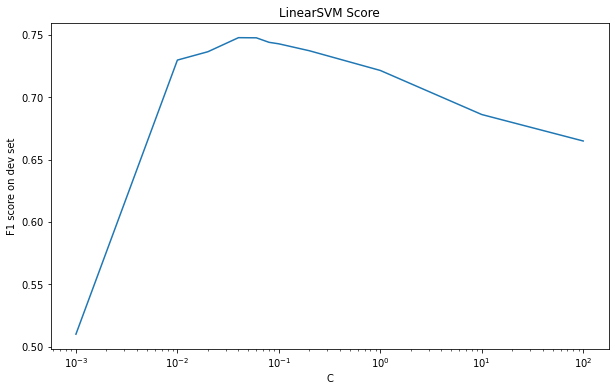

C = 0.04  yields the best classification performance with F1-score of 0.747866


In [27]:
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt


C_range= [0.001, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 1.0, 10.0, 100.0]
F1_lsvm = {}

#train and test
for C in C_range:
    lsvm = LinearSVC(C=C, tol=1e-4,dual=False,random_state=0)
    lsvm.fit(BOW_X_train, y_train)
    lsvm_pred = lsvm.predict(BOW_X_dev)
    #calculate F1
    print('When C= ', C)
    F1_lsvm[C] = f1(lsvm_pred, y_dev, 'LinearSVM Classifier')
    
    if C == max(F1_lsvm, key=F1_lsvm.get):
        lsvm_best_estimator = lsvm
        lsvm_bestC = C
        
#plot the F1 score figure

def lsvm_plot (C_range, F1_lsvm):  
    plt.subplots(figsize=(10,6))
    plt.plot(C_range, F1_lsvm.values())
    plt.xlabel('C') 
    plt.ylabel('F1 score on dev set') 
    plt.xscale("log")
    plt.title('LinearSVM Score') 
    plt.show() 

lsvm_plot(C_range, F1_lsvm)

#compare the best parameter with Linear Regression Classifier
print('C =', lsvm_bestC,' yields the best classification performance with F1-score of {:4f}'.format(F1_lsvm[lsvm_bestC]))


### We can see that the best LinearSVM classifier (F1-score=0.7478668) slightly underperforms the logistic regression classfier (F1-score = 0.745575).
### According to our LinearSVM classifier, the Top 10 words for deciding whether a tweet is about a real disaster or not are:
<font color=orange size=4.9><b> [ massacre, explosion, hailstorm, evacuated, typhoon, bombing, earthquake, storm, hiroshima, wildfire ]</b> </font>
### Comparing with the Top 10 most important keywords of LR classifier:
<font color=orange size=4.9><b> [ massacre, hailstorm, evacuated, migrant, typhoon, bombing, earthquake, storm, hiroshima, wildfire ]</b></font>
### we can see that 9 out of 10 of the keywords are the same for both classifier. The only different word is <font color=blue> migrant </font> vs <font color=blue> explosion </font>

In [32]:
print_top10(count_vect, lsvm_best_estimator, lsvm.classes_)

The top ten feature names are:
0: massacre, explosion, hailstorm, evacuated, typhoon, bombing, earthquake, storm, hiroshima, wildfire
1: massacre, explosion, hailstorm, evacuated, typhoon, bombing, earthquake, storm, hiroshima, wildfire


# (h) Non-linear SVM
 - For each value of hyperparameter, train the classifier on the train set, and compute its F1-score on the dev set
 - Creat a plot of the resultant F1-score for each hyperparameter on dev set
 - Find the best classifier and compare the F-1 score with linear regression classifier

In [28]:
#Logistic Regression vs SVM
#https://medium.com/axum-labs/logistic-regression-vs-support-vector-machines-svm-c335610a3d16#:~:text=SVM%20tries%20to%20finds%20the,are%20near%20the%20optimal%20point.

from sklearn.svm import SVC



C_list = list(3. ** np.arange(-4, 6))
gamma_list = list(2. ** np.arange(-10, 1))
F1_rbfsvm = np.zeros((len(C_list), len(gamma_list)))
F1_rbfsvm_best = 0

#train and test


for i in range(len(C_list)):
    for j in range(len(gamma_list)):
        C=C_list[i]
        gamma=gamma_list[j]    
        rbfsvm = SVC(kernel= 'rbf', C=C, gamma=gamma, random_state=0)
        rbfsvm.fit(BOW_X_train, y_train)
        rbfsvm_pred = rbfsvm.predict(BOW_X_dev)
        #calculate F1
        print('When C= ', C, 'gamma=',gamma)
        F1_rbfsvm[i][j] = f1(rbfsvm_pred, y_dev, 'Rbf-SVM Classifier')

        if F1_rbfsvm[i,j] > F1_rbfsvm_best:
            F1_rbfsvm_best = F1_rbfsvm[i][j]
            rbfsvm_best_estimator = rbfsvm
            rbfsvm_bestC = C
            best_i = i
            rbfsvm_bestgamma = gamma
            best_j = j

print('Best C=',rbfsvm_bestC,'Best gamma=',rbfsvm_bestgamma,'best f1 score= ', F1_rbfsvm_best)


When C=  0.012345679012345678 gamma= 0.0009765625
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.001953125
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.00390625
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.0078125
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.015625
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.03125
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.0625
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.125
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.25
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 0.5
Rbf-SVM Classifier shows F1 score of 0.000000
When C=  0.012345679012345678 gamma= 1.0
Rbf-SVM Classifier shows F1 score of 0.00000

Best C= 100.0 Best gamma= 0.001 best f1 score=  0.7390300230946883


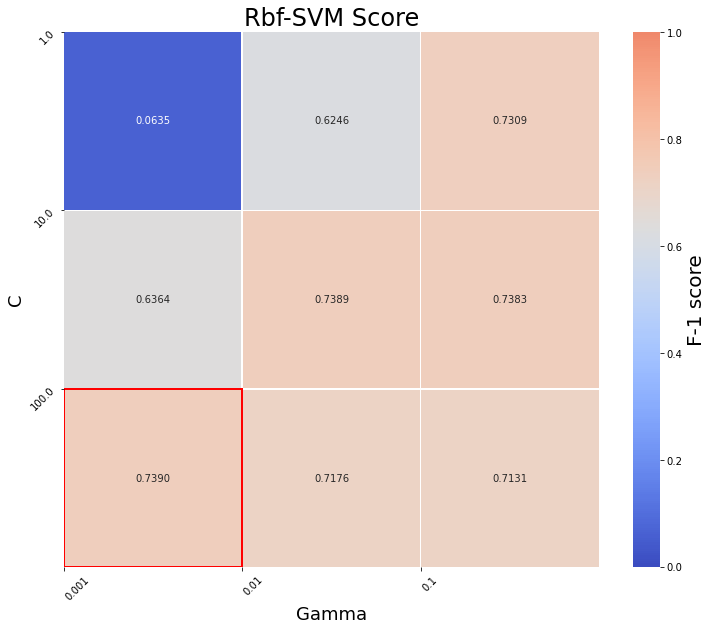

In [42]:

import seaborn as sns
from matplotlib.patches import Rectangle 

print('Best C=',rbfsvm_bestC,'Best gamma=',rbfsvm_bestgamma,'best f1 score= ', F1_rbfsvm_best)

def rbfsvm_heatpmap (gamma_list, C_list, F1_rbfsvm, best_i, best_j):
    plt.subplots(figsize=(12,12))
    fig=sns.heatmap(F1_rbfsvm,
                cmap='coolwarm',
                linewidth=0.5,
                center=np.mean(F1_rbfsvm),
                robust=True,
                vmin=0.0,
                vmax =1.0,
                square=True,
                annot=True,
                fmt=".4f",
                cbar_kws={'label': 'F-1 score','shrink': .82})
    plt.title('Rbf-SVM Score',fontsize=24)
    plt.xlabel('Gamma',fontsize=18)
    plt.ylabel('C',fontsize=18)
    fig.figure.axes[-1].yaxis.label.set_size(20)
    plt.xticks(np.arange(len(gamma_list)), [round(gamma, 6) for gamma in gamma_list ],rotation=45,ha="left")
    plt.yticks(np.arange(len(C_list)), [round(C, 4) for C in C_list ], rotation=45)
    fig.add_patch(Rectangle((best_j,best_i),1,1, fill=False, edgecolor='red', lw=2))
    plt.show()

rbfsvm_heatpmap(gamma_list, C_list, F1_rbfsvm, best_i, best_j)


# (i) Ngram
 - Using N = 2, construct feature representations of the tweets in the train and dev tweets
 - Discuss how you chose the threshold M
 - report the total number of 1-grams and 2-grams in your vocabulary
 - randomly sample 10 2-grams from your vocabulary, and print them out
 - repeat parts (e)-(h), and report the results. 
   Do these results differ significantly from those using the bag of words model? 
   Discuss what this implies about the task.

###  Using N = 2, construct feature representations of the tweets in the train and dev tweets


In [29]:
#https://scikit-learn.org/stable/modules/feature_extraction.html
bigram_vectorizer = CountVectorizer(ngram_range=(1, 2), \
                                     token_pattern=r'\b\w+\b', min_df=4)

X_2 = bigram_vectorizer.fit_transform(X_train['lemmatized']).toarray()
X_dev_2 = bigram_vectorizer.transform(X_dev['lemmatized']).toarray()

### Discuss how you chose the threshold M

We sampled and examined the frequency of the top 50% Ngrams and decide that M=4.

### the total number of 1-grams and 2-grams is 3239

In [30]:
X_2.shape
# X_dev_2.shape
#3259 features when min_df=4
#4570 features when min_df=3

(5329, 3239)

### random Ngram sample of 10: ['thunderstorm warning', 'caused structural', 'battle occurred', 'invoice make', 'flag via', 'bigger projected', 'chemical dependency', 'incident injury', 'aftershock dubstep', 'rise top']

- slightly different every time, according to how the train/dev set was randomly divided


In [33]:
# randomly sample 10 2-grams from your vocabulary, and print them out
import random

bigram_fnames = bigram_vectorizer.get_feature_names()

#extract only the 2-grams from the mixture
bigram_2gram = [word for word in bigram_fnames if len(word.split(" "))==2]
        
bigram_sample = random.sample(bigram_2gram, 10)

print(bigram_sample)

['thunderstorm warning', 'caused structural', 'battle occurred', 'invoice make', 'flag via', 'bigger projected', 'chemical dependency', 'incident injury', 'aftershock dubstep', 'rise top']


### applying different classifiers (e)~(h) with Ngram 
    Naive Bayes, Bernoulli shows F1 score of 0.722719
    Logistic Regression shows F1 score of 0.739179
    SVM at C = 0.04 shows F1 score of 0.742138
    

##### (e2)Naive Bayes Bernoulli with Ngram

In [34]:
# Naive Bayes Bernoulli classifier
#codes from CS5785 lecture note 8

n = X_2.shape[0] #dataset size
d = X_2.shape[1] #number of features in our dataset
K = 2 #number of classes. Here we have two: disaster, not disaste

#build empty vectors of corresponding shapes
psis = np.zeros([K,d])
phis = np.zeros([K])


#compute parameters and fill in the vectors for each class
for k in range(K):
    X_k = X_2[y_train == k]
    psis[k] = np.mean(X_k, axis=0) #feature probability 
    phis[k] = X_k.shape[0] / float(n) #class proportion
    

print("phis of each class:", phis)


def nb_predictions(x, psis, phis):
    #to compute \arg\max_y p(x|y)*p(y)
    
    #adjust shapes
    n, d = x.shape
    x = np.reshape(x, (1 , n, d))
    psis = np.reshape(psis, (K, 1, d))
    
    #clip probabilities to avoid log(0)
    psis = psis.clip(1e-14, 1-1e-14)
    
    #compute log-probabilities 
    logpy = np.log(phis).reshape([K,1])
    logpxy = x*np.log(psis) + (1-x)*np.log(1-psis)
    logpyx = logpxy.sum(axis=2) + logpy
    
    return logpyx.argmax(axis=0).flatten(), logpyx.reshape([K,n])

x_pred, computedlogpyx = nb_predictions(X_dev_2, psis, phis)

f1(x_pred, y_dev, 'Naive Bayes, Bernoulli')

phis of each class: [0.56370801 0.43629199]
Naive Bayes, Bernoulli shows F1 score of 0.722719


0.7227191413237926

##### (f2) Log Reg with Ngram

In [39]:
# Fitting a simple Logistic Regression on BoW
logreg_bow = LogisticRegression(C=1.0)
lr_trained = logreg_bow.fit(X_2, y_train)

#metrics
lr_x_pred = lr_trained.predict(X_dev_2)

f1(lr_x_pred, y_dev, 'Logistic Regression')
print_top10(bigram_vectorizer, lr_trained, class_labels)

Logistic Regression shows F1 score of 0.739179
The top ten feature names are:
0: japan, casualty, derailment, flood, storm, drought, typhoon, earthquake, wildfire, hiroshima
1: japan, casualty, derailment, flood, storm, drought, typhoon, earthquake, wildfire, hiroshima


##### (g2) LinearSVM Classifier with Ngram

When C=  0.001
LinearSVM Classifier shows F1 score of 0.528926
When C=  0.01
LinearSVM Classifier shows F1 score of 0.724305
When C=  0.02
LinearSVM Classifier shows F1 score of 0.728983
When C=  0.04
LinearSVM Classifier shows F1 score of 0.742138
When C=  0.06
LinearSVM Classifier shows F1 score of 0.740657
When C=  0.08
LinearSVM Classifier shows F1 score of 0.738617
When C=  0.1
LinearSVM Classifier shows F1 score of 0.736607
When C=  0.2
LinearSVM Classifier shows F1 score of 0.728368
When C=  1.0
LinearSVM Classifier shows F1 score of 0.708928
When C=  10.0
LinearSVM Classifier shows F1 score of 0.683325


/Users/dd/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


When C=  100.0
LinearSVM Classifier shows F1 score of 0.662950


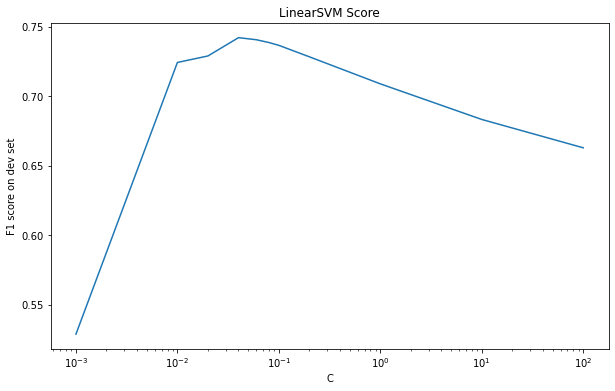

C = 0.04  yields the best classification performance with F1-score of 0.742138
The top ten feature names are:
0: derailment, typhoon, massacre, casualty, flood, storm, drought, earthquake, wildfire, hiroshima
1: derailment, typhoon, massacre, casualty, flood, storm, drought, earthquake, wildfire, hiroshima


In [40]:

C_range= [0.001, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 1.0, 10.0, 100.0]
F1_lsvm = {}

#train and test
C=0
for C in C_range:
    lsvm = LinearSVC(C=C, tol=1e-4,dual=False,random_state=0)
    lsvm.fit(X_2, y_train)
    lsvm_pred = lsvm.predict(X_dev_2)
    #calculate F1
    print('When C= ', C)
    F1_lsvm[C] = f1(lsvm_pred, y_dev, 'LinearSVM Classifier')
    
    if C == max(F1_lsvm, key=F1_lsvm.get):
        lsvm_best_estimator = lsvm
        lsvm_bestC = C
        
#plot the F1 score figure

def lsvm_plot (C_range, F1_lsvm):  
    plt.subplots(figsize=(10,6))
    plt.plot(C_range, F1_lsvm.values())
    plt.xlabel('C') 
    plt.ylabel('F1 score on dev set') 
    plt.xscale("log")
    plt.title('LinearSVM Score') 
    plt.show() 

lsvm_plot(C_range, F1_lsvm)

#compare the best parameter with Linear Regression Classifier
print('C =', lsvm_bestC,' yields the best classification performance with F1-score of {:4f}'.format(F1_lsvm[lsvm_bestC]))

print_top10(bigram_vectorizer, lsvm_best_estimator, lsvm.classes_)

### We can see that the best LinearSVM classifier (F1-score=0.742138) slightly underperforms the logistic regression classfier (F1-score = 0.739179).
### applying different classifiers (e)~(h) with Ngram 


### According to our LinearSVM classifier, the Top 10 words for deciding whether a tweet is about a real disaster or not are:
<font color=orange size=4.9><b> [ massacre, bombing, hailstorm, case, flood, evacuated, earthquake, storm, hiroshima, wildfire ]</b> </font>
### Comparing with the Top 10 most important keywords of LR classifier:
<font color=orange size=4.9><b> [ case, derailment, hailstorm, evacuated, flood, bombing, earthquake, storm, hiroshima, wildfire ]</b></font>
### we can see that 9 out of 10 of the keywords are the same for both classifier. The only different word is <font color=blue> derailment </font> vs <font color=blue> massacre </font>

##### (h2) Non-linear SVM Classifier with Ngram

After adopting Ngram model, the runtime of the Rbf-kernel SVM classifer has become significantly slower, almost 100 times slower(it takes us almost 30mins to run the 3x3 gridsearch), as it is known to be computationally expensive to run on high dimension. So I had to significantly shrink the extent of gridsearch(a range closer to previous optimal hyperparameters), otherwise it's not feasible.

In [41]:
# print('running')
C_list = list(10. ** np.arange(0, 3))
gamma_list = list(10. ** np.arange(-3, 0))
F1_rbfsvm = np.zeros((len(C_list), len(gamma_list)))
F1_rbfsvm_best = 0
print('running')
#train and test

for i in range(len(C_list)):
    for j in range(len(gamma_list)):
        C=C_list[i]
        gamma=gamma_list[j]    
        rbfsvm = SVC(kernel= 'rbf', C=C, gamma=gamma, random_state=0)
        rbfsvm.fit(X_2, y_train)
        rbfsvm_pred = rbfsvm.predict(X_dev_2)
        #calculate F1
        print('When C= ', C, 'gamma=',gamma)
        F1_rbfsvm[i][j] = f1(rbfsvm_pred, y_dev, 'Rbf-SVM Classifier')

        if F1_rbfsvm[i,j] > F1_rbfsvm_best:
            F1_rbfsvm_best = F1_rbfsvm[i][j]
            rbfsvm_best_estimator = rbfsvm
            rbfsvm_bestC = C
            best_i = i
            rbfsvm_bestgamma = gamma
            best_j = j

print('Best C=',rbfsvm_bestC,'Best gamma=',rbfsvm_bestgamma,'best f1 score= ', F1_rbfsvm_best)
rbfsvm_heatpmap(gamma_list, C_list, F1_rbfsvm, best_i, best_j)

running
When C=  1.0 gamma= 0.001
Rbf-SVM Classifier shows F1 score of 0.063460
When C=  1.0 gamma= 0.01
Rbf-SVM Classifier shows F1 score of 0.624571
When C=  1.0 gamma= 0.1
Rbf-SVM Classifier shows F1 score of 0.730905
When C=  10.0 gamma= 0.001
Rbf-SVM Classifier shows F1 score of 0.636364
When C=  10.0 gamma= 0.01
Rbf-SVM Classifier shows F1 score of 0.738854
When C=  10.0 gamma= 0.1
Rbf-SVM Classifier shows F1 score of 0.738328
When C=  100.0 gamma= 0.001
Rbf-SVM Classifier shows F1 score of 0.739030
When C=  100.0 gamma= 0.01
Rbf-SVM Classifier shows F1 score of 0.717565
When C=  100.0 gamma= 0.1
Rbf-SVM Classifier shows F1 score of 0.713128
Best C= 100.0 Best gamma= 0.001 best f1 score=  0.7390300230946883


NameError: name 'rbfsvm_heatpmap' is not defined

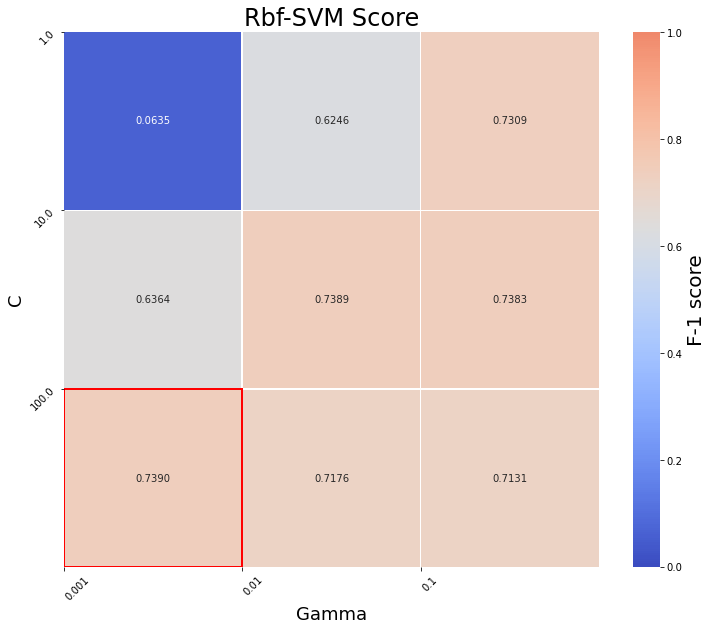

In [43]:
rbfsvm_heatpmap(gamma_list, C_list, F1_rbfsvm, best_i, best_j)

# (j) Incorporating the additional columns.

    Append WORDS to the tweet,and re-calculatethe bag of words or N -grams features
    Create new categorical features corresponding tothe different values these columns
    could take, and append these to the bag of words or N -grams features.

In [42]:

#reopen the train dataset to work with the entire 'keyword' and 'location' column 
train = pd.read_csv('train.csv')
y = train.pop('target').values
X1 = train

"""dealing with null values. Fill in with '0' which will be stripped later"""

#Check null values 61/2533
X1.isnull().sum()
X1 = X1.fillna('0')
# print(X['keyword'].value_counts())
# print(X['location'].value_counts())


"""preprocessing for keyword and location"""

#=====cleaning keyword =======

#punctuations, hashtags, and numbers 
X1['keyword'] = X1['keyword'].str.replace("[^a-zA-Z0-9]"," ")
X1['keyword'] = X1['keyword'].str.replace('\d+', '')
#lowercase
X1['keyword'] = X1['keyword'].str.lower()

#=====cleaning location =======

#stripURL,mention,punctuations, hashtags, and numbers 
X1['location'] = X1['location'].str.replace("[^a-zA-Z0-9]"," ")
X1['location'] = X1['location'].str.replace('\d+', '')
#lowercase
X1['location'] = X1['location'].str.lower()



"""tokenize and lemmatize keyword and location"""

X1['keyword'] = X1['keyword'].apply(lambda x:tokenize(x))
X1['location'] = X1['location'].apply(lambda x:tokenize(x))
X1['processed_keyword'] = X1['keyword'].apply(lambda x:wordLem(x))
X1['processed_location'] = X1['location'].apply(lambda x:wordLem(x))


"""Appending processed keyword and locatoin to the text"""

print("\n before appending: \n", X1['text'][1114])

X1['newtext'] = X1['text'] + ' ' +  X1['processed_keyword'] + ' ' + X1['processed_location']

print("\n after appending: \n", X1['newtext'][1114])


 before appending: 
 .@RaniaKhalek true. I faced everything from 'Is Bin Laden your uncle?' to 'Hopefully Afghanistan will be bombed'. Children can be very ugly.

 after appending: 
 .@RaniaKhalek true. I faced everything from 'Is Bin Laden your uncle?' to 'Hopefully Afghanistan will be bombed'. Children can be very ugly. bombed kabul tuebingen innsbruck


In [43]:
X1.head()

,id,keyword,location,text,processed_keyword,processed_location,newtext
0,1,[],[],Our Deeds are the Reason of this #earthquake M...,,,Our Deeds are the Reason of this #earthquake M...
1,4,[],[],Forest fire near La Ronge Sask. Canada,,,Forest fire near La Ronge Sask. Canada
2,5,[],[],All residents asked to 'shelter in place' are ...,,,All residents asked to 'shelter in place' are ...
3,6,[],[],"13,000 people receive #wildfires evacuation or...",,,"13,000 people receive #wildfires evacuation or..."
4,7,[],[],Just got sent this photo from Ruby #Alaska as ...,,,Just got sent this photo from Ruby #Alaska as ...


In [44]:
X1['key_loc_added'] = X1['processed_keyword'] + ' ' + X1['processed_location']
added = pd.DataFrame(X1['key_loc_added'])
X = pd.concat([X,added], axis=1)
X.head()

,id,keyword,location,text,tweet,tokenized,cleantokens,lemmatized,key_loc_added
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake m...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...",deed reason earthquake may allah forgive u,
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada,
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are ...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...",resident asked shelter place notified officer ...,
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders ...,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order...",people receive wildfire evacuation order calif...,
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as ...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...,


In [45]:
X['newtext'] = X['lemmatized'] + ' ' +  X['key_loc_added']
X.head()

,id,keyword,location,text,tweet,tokenized,cleantokens,lemmatized,key_loc_added,newtext
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake m...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...",deed reason earthquake may allah forgive u,,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada,,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are ...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...",resident asked shelter place notified officer ...,,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders ...,"[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order...",people receive wildfire evacuation order calif...,,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as ...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfire pour...,,got sent photo ruby alaska smoke wildfire pour...


#### Re-make the Ngram

In [46]:
# split the train and dev with the combined X 
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=0.70,test_size=0.30)
print("train data: ",X_train.shape)
print("dev data: ",X_dev.shape)

train data:  (5329, 10)
dev data:  (2284, 10)


In [47]:

#reopen the train dataset to work with the entire 'keyword' and 'location' column 
train = pd.read_csv('train.csv')
y = train.pop('target').values
X1 = train

"""dealing with null values. Fill in with '0' which will be stripped later"""

#Check null values 61/2533
X1.isnull().sum()
X1 = X1.fillna('0')
# print(X['keyword'].value_counts())
# print(X['location'].value_counts())


"""preprocessing for keyword and location"""

#=====cleaning keyword =======

#punctuations, hashtags, and numbers 
X1['keyword'] = X1['keyword'].str.replace("[^a-zA-Z0-9]"," ")
X1['keyword'] = X1['keyword'].str.replace('\d+', '')
#lowercase
X1['keyword'] = X1['keyword'].str.lower()

#=====cleaning location =======

#stripURL,mention,punctuations, hashtags, and numbers 
X1['location'] = X1['location'].str.replace("[^a-zA-Z0-9]"," ")
X1['location'] = X1['location'].str.replace('\d+', '')
#lowercase
X1['location'] = X1['location'].str.lower()



"""tokenize and lemmatize keyword and location"""

X1['keyword'] = X1['keyword'].apply(lambda x:tokenize(x))
X1['location'] = X1['location'].apply(lambda x:tokenize(x))
X1['processed_keyword'] = X1['keyword'].apply(lambda x:wordLem(x))
X1['processed_location'] = X1['location'].apply(lambda x:wordLem(x))


"""Appending processed keyword and locatoin to the text"""

print("\n before appending: \n", X1['text'][1114])

X1['newtext'] = X1['text'] + ' ' +  X1['processed_keyword'] + ' ' + X1['processed_location']

print("\n after appending: \n", X1['newtext'][1114])


 before appending: 
 .@RaniaKhalek true. I faced everything from 'Is Bin Laden your uncle?' to 'Hopefully Afghanistan will be bombed'. Children can be very ugly.

 after appending: 
 .@RaniaKhalek true. I faced everything from 'Is Bin Laden your uncle?' to 'Hopefully Afghanistan will be bombed'. Children can be very ugly. bombed kabul tuebingen innsbruck


In [48]:
X_2_re = bigram_vectorizer.fit_transform(X_train['newtext']).toarray()
X_dev_2_re = bigram_vectorizer.transform(X_dev['newtext']).toarray()

#### Logistic Regression with Re-made Ngram
    Logistic Regression shows F1 score of 0.746494

In [130]:
# Fitting a simple Logistic Regression on new Ngram bow
logreg_bow = LogisticRegression(C=1.0)
lr_trained = logreg_bow.fit(X_2_re, y_train)

#metrics
lr_x_pred = lr_trained.predict(X_dev_2_re)

f1(lr_x_pred, y_dev, 'Logistic Regression')
print_top10(bigram_vectorizer, lr_trained, class_labels)

Logistic Regression shows F1 score of 0.735182
The top ten feature names are:
0: palo, fatal, church, hostage, blown away, pm wreckage, perhaps, continue, property casualty, evil
1: palo, fatal, church, hostage, blown away, pm wreckage, perhaps, continue, property casualty, evil


#### LinearSVM with Re-made Ngram

When C=  0.001
LinearSVM Classifier shows F1 score of 0.628832
When C=  0.01
LinearSVM Classifier shows F1 score of 0.726757
When C=  0.02
LinearSVM Classifier shows F1 score of 0.735196
When C=  0.04
LinearSVM Classifier shows F1 score of 0.734107
When C=  0.06
LinearSVM Classifier shows F1 score of 0.731384
When C=  0.08
LinearSVM Classifier shows F1 score of 0.731065
When C=  0.1
LinearSVM Classifier shows F1 score of 0.733115
When C=  0.2
LinearSVM Classifier shows F1 score of 0.722762
When C=  1.0
LinearSVM Classifier shows F1 score of 0.694371
When C=  10.0
LinearSVM Classifier shows F1 score of 0.668731


c:\users\hr\appdata\local\programs\python\python38\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


When C=  100.0
LinearSVM Classifier shows F1 score of 0.665983


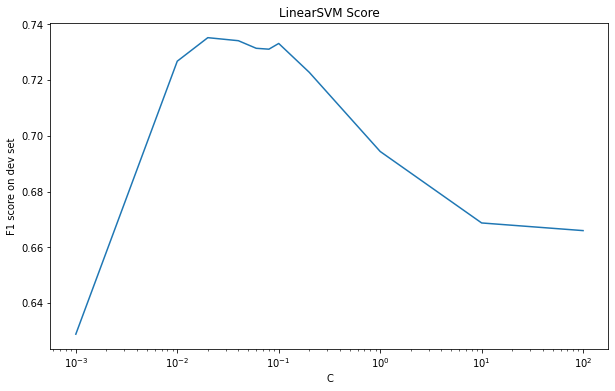

C = 0.02  yields the best classification performance with F1-score of 0.735196
The top ten feature names are:
0: evacuated, derailment, massacre, drought, flood, train, typhoon, earthquake, wildfire, hiroshima
1: evacuated, derailment, massacre, drought, flood, train, typhoon, earthquake, wildfire, hiroshima


In [50]:

C_range= [0.001, 0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 1.0, 10.0, 100.0]
F1_lsvm = {}

#train and test
C=0
for C in C_range:
    lsvm = LinearSVC(C=C, tol=1e-4,dual=False,random_state=0)
    lsvm.fit(X_2_re, y_train)
    lsvm_pred = lsvm.predict(X_dev_2_re)
    #calculate F1
    print('When C= ', C)
    F1_lsvm[C] = f1(lsvm_pred, y_dev, 'LinearSVM Classifier')
    
    if C == max(F1_lsvm, key=F1_lsvm.get):
        lsvm_best_estimator = lsvm
        lsvm_bestC = C
        
#plot the F1 score figure

def lsvm_plot (C_range, F1_lsvm):  
    plt.subplots(figsize=(10,6))
    plt.plot(C_range, F1_lsvm.values())
    plt.xlabel('C') 
    plt.ylabel('F1 score on dev set') 
    plt.xscale("log")
    plt.title('LinearSVM Score') 
    plt.show() 

lsvm_plot(C_range, F1_lsvm)

#compare the best parameter with Linear Regression Classifier
print('C =', lsvm_bestC,' yields the best classification performance with F1-score of {:4f}'.format(F1_lsvm[lsvm_bestC]))

print_top10(bigram_vectorizer, lsvm_best_estimator, lsvm.classes_)

#### Non-linear SVM with Re-made Ngram
As mentioned before, it has become very computationally expensive to run Rbf-kernel SVM with the additional feature. So we had to shrink the extent of the gridsearch (a range closer to previous optimal hyperparameter)

running
When C=  1.0 gamma= 0.001
Rbf-SVM Classifier shows F1 score of 0.200371
When C=  1.0 gamma= 0.01
Rbf-SVM Classifier shows F1 score of 0.689116
When C=  1.0 gamma= 0.1
Rbf-SVM Classifier shows F1 score of 0.734463
When C=  10.0 gamma= 0.001
Rbf-SVM Classifier shows F1 score of 0.697400
When C=  10.0 gamma= 0.01
Rbf-SVM Classifier shows F1 score of 0.723239
When C=  10.0 gamma= 0.1
Rbf-SVM Classifier shows F1 score of 0.709258
When C=  100.0 gamma= 0.001
Rbf-SVM Classifier shows F1 score of 0.721330
When C=  100.0 gamma= 0.01
Rbf-SVM Classifier shows F1 score of 0.700792
When C=  100.0 gamma= 0.1
Rbf-SVM Classifier shows F1 score of 0.709642
Best C= 1.0 Best gamma= 0.1 best f1 score=  0.7344632768361581


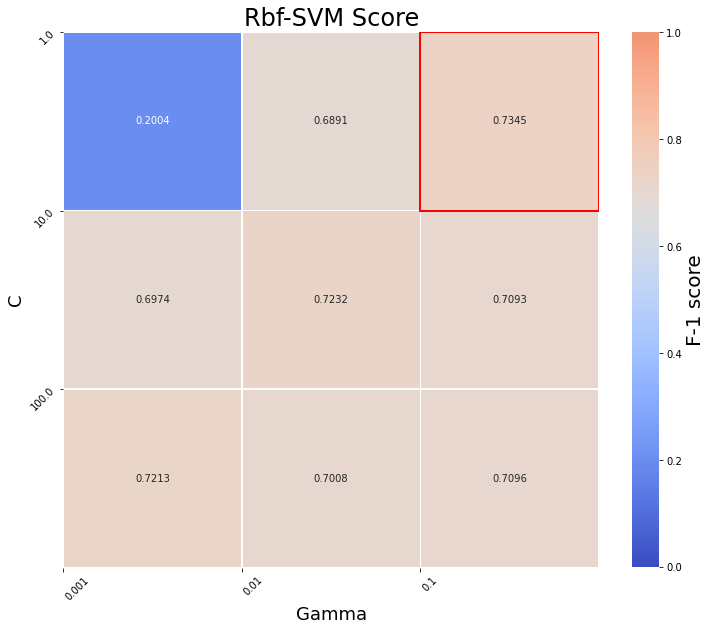

In [52]:
# print('running')
C_list = list(10. ** np.arange(0, 3))
gamma_list = list(10. ** np.arange(-3, 0))
F1_rbfsvm = np.zeros((len(C_list), len(gamma_list)))
F1_rbfsvm_best = 0
print('running')
#train and test

for i in range(len(C_list)):
    for j in range(len(gamma_list)):
        C=C_list[i]
        gamma=gamma_list[j]    
        rbfsvm = SVC(kernel= 'rbf', C=C, gamma=gamma, random_state=0)
        rbfsvm.fit(X_2_re, y_train)
        rbfsvm_pred = rbfsvm.predict(X_dev_2_re)
        #calculate F1
        print('When C= ', C, 'gamma=',gamma)
        F1_rbfsvm[i][j] = f1(rbfsvm_pred, y_dev, 'Rbf-SVM Classifier')

        if F1_rbfsvm[i,j] > F1_rbfsvm_best:
            F1_rbfsvm_best = F1_rbfsvm[i][j]
            rbfsvm_best_estimator = rbfsvm
            rbfsvm_bestC = C
            best_i = i
            rbfsvm_bestgamma = gamma
            best_j = j

print('Best C=',rbfsvm_bestC,'Best gamma=',rbfsvm_bestgamma,'best f1 score= ', F1_rbfsvm_best)
rbfsvm_heatpmap(gamma_list, C_list, F1_rbfsvm, best_i, best_j)

# (k) Finalizing your kernel
### Out of all of the joint approaches you have considered so far, for both constructing feature vectors and training a classifier on these vectors, which do you believe is the best for accurately predicting whether a tweet is of a real disaster or not? Justify your choice. Then, using your chosen best approach, re-build your feature vectors and re-train your classifier using the entire Kaggle training data (i.e. using all of the data in both the train and dev sets), and test it on the Kaggle test data. Submit your results to Kaggle, and report the resulting F1-score on the test data, as reported by Kaggle. Was this lower or higher than you expected? Discuss.

| Feature\Classifier | Naive Bayes | Logistic Regression | LinearSVM | Rbf-SVM |
| :-: | :-: | :-: | :-: | :-: | 
| Bag of Words | 0.733371 | 0.727880 | 0.727068 | 0.728664 |
| N-gram (N=1+2)  | 0.711272 | 0.724832 | 0.721219 | 0.721467 |
| N-gram (text+location+keyword) | N/A | 0.735182 | 0.735196 | 0.734463 |

### In the table above, we have the F-1 score for all the joint approaches. Among them, we can see that N-gram(text+loc+keyword)+LinearSVM and Logistic Regression achieves the overall hightest F1 score. And if we examine the other combinations, we can see that both LinearSVM and Logistics Regression have a very robust performance. And when the dimension is lower(BoW or N-gram), Rbf-SVM also show a good accuracy. NaiveBayes is only good when used on BoW.

### Overall, I think N-gram(text+loc+keyword)+Logistic Regression is the best for accurately predicting whether a tweet is of a real disaster or not, because it's achieves the highest accuracy when being the most robust with a low run-time. Here we'll directly use X which is already rendered as the Ngram(text+loc+keyword) model of the entire Kaggle training data. But we'll need to process the test.csv

In [73]:

#reopen the train dataset to work with the entire 'keyword' and 'location' column 
X_test = pd.read_csv('test.csv')
print('load test.csv successful!')

"""dealing with null values. Fill in with '0' which will be stripped later"""

#Check null values 61/2533
X_test.isnull().sum()
X_test = X_test.fillna('0')
# print(X['keyword'].value_counts())
# print(X['location'].value_counts())

#=====cleaning training set========
#lowercase
X_test['tweet'] = X_test['text'].apply(lambda word: word.lower())
#stripURL,mention,punctuations, hashtags, and numbers 
X_test['tweet'] = X_test['tweet'].apply(lambda x: strip_URL(x))
X_test['tweet'] = X_test['tweet'].apply(lambda x: strip_mention(x))
X_test['tweet'] = X_test['tweet'].str.replace("[^a-zA-Z0-9]"," ")
X_test['tweet'] = X_test['tweet'].apply(lambda x: strip_numbers(x))

X_test['tokenized'] = X_test['tweet'].apply(lambda x:tokenize(x))
X_test['cleantokens'] = X_test['tokenized'].apply\
                            (lambda x: [word for word in x if word not in stop_words])

X_test['lemmatized'] = X['cleantokens'].apply(lambda x:wordLem(x))



load test.csv successful!


In [74]:
X_test.head()

,id,keyword,location,text,tweet,tokenized,cleantokens,lemmatized
0,0,0,0,Just happened a terrible car crash,just happened a terrible car crash,"[just, happened, a, terrible, car, crash]","[happened, terrible, car, crash]",deed reason earthquake may allah forgive u
1,2,0,0,"Heard about #earthquake is different cities, s...",heard about earthquake is different cities s...,"[heard, about, earthquake, is, different, citi...","[heard, earthquake, different, cities, stay, s...",forest fire near la ronge sask canada
2,3,0,0,"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are...,"[there, is, a, forest, fire, at, spot, pond, g...","[forest, fire, spot, pond, geese, fleeing, acr...",resident asked shelter place notified officer ...
3,9,0,0,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires,"[apocalypse, lighting, spokane, wildfires]","[apocalypse, lighting, spokane, wildfires]",people receive wildfire evacuation order calif...
4,11,0,0,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills in china and taiwan,"[typhoon, soudelor, kills, in, china, and, tai...","[typhoon, soudelor, kills, china, taiwan]",got sent photo ruby alaska smoke wildfire pour...


In [75]:

"""preprocessing for keyword and location"""

#=====cleaning keyword =======

#punctuations, hashtags, and numbers 
X_test['keyword'] = X_test['keyword'].str.replace("[^a-zA-Z0-9]"," ")
X_test['keyword'] = X_test['keyword'].str.replace('\d+', '')
#lowercase
X_test['keyword'] = X_test['keyword'].str.lower()

#=====cleaning location =======

#stripURL,mention,punctuations, hashtags, and numbers 
X_test['location'] = X_test['location'].str.replace("[^a-zA-Z0-9]"," ")
X_test['location'] = X_test['location'].str.replace('\d+', '')
#lowercase
X_test['location'] = X_test['location'].str.lower()



"""tokenize and lemmatize keyword and location"""

X_test['keyword'] = X_test['keyword'].apply(lambda x:tokenize(x))
X_test['location'] = X_test['location'].apply(lambda x:tokenize(x))
X_test['processed_keyword'] = X_test['keyword'].apply(lambda x:wordLem(x))
X_test['processed_location'] = X_test['location'].apply(lambda x:wordLem(x))


"""Appending processed keyword and locatoin to the text"""


X_test['newtext'] = X_test['text'] + ' ' +  X_test['processed_keyword'] + ' ' + X_test['processed_location']


X_test['key_loc_added'] = X_test['processed_keyword'] + ' ' + X_test['processed_location']
# added = pd.DataFrame(X_test['key_loc_added'])
# X_test = pd.concat([X_test,added], axis=1)
X_test['newtext'] = X_test['lemmatized'] + ' ' +  X_test['key_loc_added']


,id,keyword,location,text,tweet,tokenized,cleantokens,lemmatized,processed_keyword,processed_location,newtext,key_loc_added
0,0,[],[],Just happened a terrible car crash,just happened a terrible car crash,"[just, happened, a, terrible, car, crash]","[happened, terrible, car, crash]",deed reason earthquake may allah forgive u,,,deed reason earthquake may allah forgive u,
1,2,[],[],"Heard about #earthquake is different cities, s...",heard about earthquake is different cities s...,"[heard, about, earthquake, is, different, citi...","[heard, earthquake, different, cities, stay, s...",forest fire near la ronge sask canada,,,forest fire near la ronge sask canada,
2,3,[],[],"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are...,"[there, is, a, forest, fire, at, spot, pond, g...","[forest, fire, spot, pond, geese, fleeing, acr...",resident asked shelter place notified officer ...,,,resident asked shelter place notified officer ...,
3,9,[],[],Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires,"[apocalypse, lighting, spokane, wildfires]","[apocalypse, lighting, spokane, wildfires]",people receive wildfire evacuation order calif...,,,people receive wildfire evacuation order calif...,
4,11,[],[],Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills in china and taiwan,"[typhoon, soudelor, kills, in, china, and, tai...","[typhoon, soudelor, kills, china, taiwan]",got sent photo ruby alaska smoke wildfire pour...,,,got sent photo ruby alaska smoke wildfire pour...,


In [76]:
X_test.pop('processed_keyword').values
X_test.pop('processed_location').values
X_test.head()


,id,keyword,location,text,tweet,tokenized,cleantokens,lemmatized,newtext,key_loc_added
0,0,[],[],Just happened a terrible car crash,just happened a terrible car crash,"[just, happened, a, terrible, car, crash]","[happened, terrible, car, crash]",deed reason earthquake may allah forgive u,deed reason earthquake may allah forgive u,
1,2,[],[],"Heard about #earthquake is different cities, s...",heard about earthquake is different cities s...,"[heard, about, earthquake, is, different, citi...","[heard, earthquake, different, cities, stay, s...",forest fire near la ronge sask canada,forest fire near la ronge sask canada,
2,3,[],[],"there is a forest fire at spot pond, geese are...",there is a forest fire at spot pond geese are...,"[there, is, a, forest, fire, at, spot, pond, g...","[forest, fire, spot, pond, geese, fleeing, acr...",resident asked shelter place notified officer ...,resident asked shelter place notified officer ...,
3,9,[],[],Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires,"[apocalypse, lighting, spokane, wildfires]","[apocalypse, lighting, spokane, wildfires]",people receive wildfire evacuation order calif...,people receive wildfire evacuation order calif...,
4,11,[],[],Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills in china and taiwan,"[typhoon, soudelor, kills, in, china, and, tai...","[typhoon, soudelor, kills, china, taiwan]",got sent photo ruby alaska smoke wildfire pour...,got sent photo ruby alaska smoke wildfire pour...,


In [89]:
X_re = bigram_vectorizer.fit_transform(X['newtext']).toarray()
X_test_re = bigram_vectorizer.transform(X_test['newtext']).toarray()

In [90]:
bigram_vectorizer

CountVectorizer(min_df=4, ngram_range=(1, 2), token_pattern='\\b\\w+\\b')

In [91]:


#metrics




F1_lsvm = {}

#train and test


lsvm = LinearSVC(C=lsvm_bestC, tol=1e-4,dual=False,random_state=0)
lsvm.fit(X_re, y)



        


LinearSVC(C=0.02, dual=False, random_state=0)

In [95]:
lsvm_pred = lsvm.predict(X_test_re)
lsvm_pred.shape
# X_test = pd.read_csv('test.csv')

(3263,)

In [119]:
result_dict= {'id':X_test['id'], 'target': lsvm_pred}

In [120]:
result_dict

{'id': 0           0
 1           2
 2           3
 3           9
 4          11
         ...  
 3258    10861
 3259    10865
 3260    10868
 3261    10874
 3262    10875
 Name: id, Length: 3263, dtype: int64,
 'target': array([1, 1, 1, ..., 1, 0, 0], dtype=int64)}

In [121]:
result = pd.DataFrame(data=result_dict)

In [122]:
result.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,0


In [125]:
result.to_csv('submission.csv', index=False)

In [128]:
logreg_bow_test = LogisticRegression(C=1.0)
lr_final = logreg_bow_test.fit(X_re, y)
lr_x_pred = lr_final.predict(X_test_re)
result_dict2= {'id':X_test['id'], 'target': lr_x_pred}
result2 = pd.DataFrame(data=result_dict2)
result2.to_csv('submission2.csv', index=False)

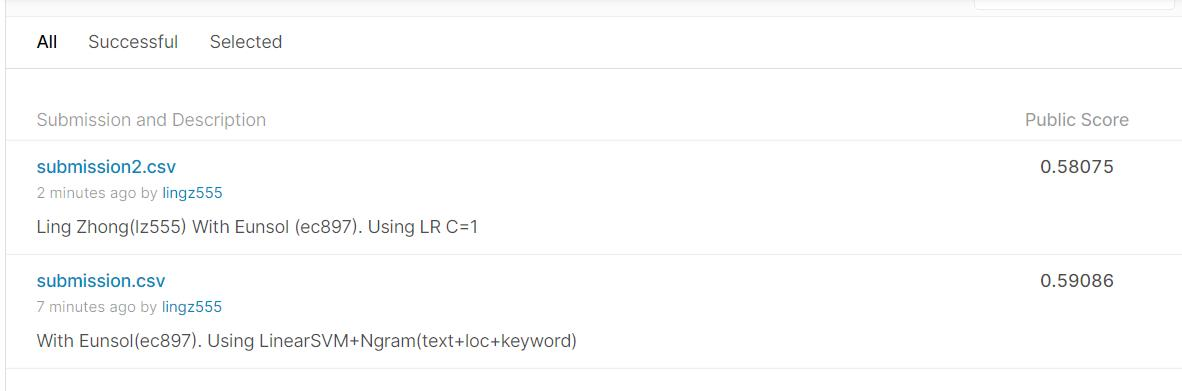

In [131]:
from IPython.display import Image
Image(filename = "./kaggle.jpg")

### The result 0.59086 is lower than I expected. I think there are several possible reasons:
- K-fold cross validation was not implemented when training the model, it's not well generalized 
- More sophisticated data pre-processing needed, for example, more sophiticated feature selection and dimension/sparsity reduction, e.g., PCA, sparse coding
- Deep neural network might achieve a much better result

# (l) Reflecting on interpretability
### If we were constructing the model as part of a consulting job, we would still use the same approach as LinearSVM has good interpretability. We can retrieve weights from the trained model and print the top feature names in making prediction, which is very helpful in explaining to our clients how the model make decisions, unlike Naive Bayesian and Rbf-SVM classifiers(more like blackboxes). Also we can easily visualize the feature statistics.